---
# Plankton Recognition Challenge
---

Plankton comprises all the organisms freely drifting with ocean currents. These life forms are a critically important piece of oceanic ecosystems, accounting for more than half the primary production on earth and nearly half the total carbon fixed in the global carbon cycle. They also form the foundation of aquatic food webs, including those of large, commercially important fisheries. Loss of plankton populations could result in ecological upheaval as well as negative societal impacts, particularly in indigenous cultures and the developing world. Plankton’s global significance makes their population levels an ideal measure of the health of the world’s oceans and ecosystems.

Traditional methods for measuring and monitoring plankton populations are time consuming and cannot scale to the granularity or scope necessary for large-scale studies. Improved approaches are needed. One such approach is through the use of underwater imagery sensors. 

In this challenge, which was prepared in cooperation with the Laboratoire d’Océanographie de Villefranche, jointly run by Sorbonne Université and CNRS, plankton images were acquired in the bay of Villefranche, weekly since 2013 and manually engineered features were computed on each imaged object. 

This challenge aims at developing solid approaches to plankton image classification. As an alternative, it is possible to use methods based on carefully (but manually) engineered features. This is in sharp contrast with “Deep Learning” methods in which features will be learned from image data alone.

The purpose of this challenge is for you to learn about the commonly used paradigms when working with real-life problems. This means you can choose one of the following paths:

- Work directly with the provided images, e.g. using a (convolutional) neural network
- Work with the supplied features extracted from the images (*native* or *skimage* or both of them)
- Extract your own features from the provided images using a technique of your choice

You will find a detailed description about the image data and the features at the end of this text.
In any case, the choice of the classifier that you decide to work with strongly depends on the choice of features.

Please bear in mind that the purpose of this challenge is not to find the best-performing model (e.g. on Kaggle there are competitions to do just that, with similar data as for this challenge). You should rather make sure to understand the dificulties that come with computer vision task, should you take this modeling approach. Moreover, you should be able to justify your choice of features/model and be able to explain its advantages and disadvantages for the task.

**IMPORTANT**: please refer to the AML course guidelines concerning grading rules. Pay especially attention to the **presentation quality** item, which boils down to: don't dump a zillion of lines of code and plots in this notebook. Produce a concise summary of your findings: this notebook can exist in two versions, a "scratch" version that you will use to work and debug, a "presentation" version that you will submit. The "presentation" notebook should go to the point, and convay the main findings of your work.

---
## Overview

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.


### 1. Data preparation:
   
_Data exploration_: The first broad component of your work should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification. Among others, you can work on:
   
* Data cleaning, e.g. treatment of categorial variables;
* Data visualisation; Computing descriptive statistics, e.g. correlation.

What is new in this challenge is that you will be working with image data. Therefore, you should have a look at example images located in the *imgs.zip* file (see description below). If you decide to work with the native or the skimage features, make sure to understand them!

Among others, this section should investigate:

- Distribution of the different image dimensions (including the number of channels)
- Distribution of the different labels that the images are assigned to

The image labels are organized in a taxonomy. We will measure the final model performance for the classification into the *level2* categories. Make sure to understand the meaning of this label inside the taxonomy.

_Data Pre-processing_: The previous step should give you a better understanding of which pre-processing is required for the data. This may include:

* Normalising and standardising the given data;
* Removing outliers;
* Carrying out feature selection, possibly using metrics derived from information theory;
* Handling missing information in the dataset;
* Augmenting the dataset with external information;
* Combining existing features.

Please take also note of the following aspects, that are related to this particular challente:

- If you decide to work with the provided features, some data cleaning may be required to make full use of all the data.
- If you decide to extract your own features from the images, you should explain your approach in this section.
- If you decide to work directly with the images themselves, preprocessing the images may improve your classification results. In particular, if you work with a neural network the following should be of interest to you:

  - Due to the fully-connected layers (that usually come after the convolutional ones), the input needs to have a fixed dimension.
  - Data augmentation (image rotation, scaling, cropping, etc. of the existing images) can be used to increase the size of the training data set. This may improve performance especially when little data is available for a particular class.
  - Be aware of the computational cost! It might be worth rescaling the images to a smaller size!

  All of the operations above are usually realized using a dataloader. This means that you do not need to create a modified version of the dataset and save it to disk. Instead, the dataloader processes the data "on the fly" and in-memory before passing it to the network.
  
    NB: Although aligning image sizes is necessary to train CNNs, this will prevent your classifier from learning about different object sizes as a feature. Additional gains may be achieved when also taking object sizes into account.

### 2. Model selection
An important part of the work involves the selection of a model that can successfully handle the given data and yield sensible predictions. Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models. There is a wealth of models to choose from, such as decision trees, random forests, (Bayesian) neural networks, Gaussian processes, LASSO regression, and so on. 

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning. There are several techniques for carrying out such a procedure, such as cross-validation.

### 3. Performance Evaluation
For the evaluation of the classification results in this challenge, you should use the F1 measure. Here the focus should be on level2 classification.

You should indicate your final evaluation score on a held-out test set. As an evaluation metric you should use the F1 score with the *average=macro* option as it is provided by the scikit-learn library. See the following link for more information:
        
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

---
## Dataset Description

#### * Location of the Dataset on the cloud platform
The data for this challenge is located at: `/mnt/datasets/plankton/flowcam`

#### * Hierachical Taxonomy Tree for Labels 

Each object is represented by a single image and is identified by a unique integer number. It has a name associated to it which is integrated in a hierarchical taxonomic tree. The identifications are gathered from different projects, classified by different people in different contexts, so they often target different taxonomic levels. For example, let us say we classify items of clothing along the following tree

    top
        shirt
            long sleeves
            short sleeves
        sweater
            hooded
            no hood
    bottom
        pants
            jeans
            other
        shorts
        
In a first project, images are classified to the finest level possible, but it may be the case that, on some pictures, it is impossible to determine whether a sweater has a hood or not, in which case it is simply classified as `sweater`. In the second project, the operator classified tops as `shirt` or `sweater` only, and bottoms to the finest level. In a third project, the operator only separated tops from bottoms. In such a context, the original names in the database cannot be used directly because, for example `sweater` will contain images that are impossible to determine as `hooded` or `no hood` *as well as* `hooded` and `no hood` images that were simply not classified further. If all three classes (`sweater`, `hooded`, and `no hood`) are included in the training set, it will likely confuse the classifier. For this reason, we define different target taxonomic levels:

-   `level1` is the finest taxonomic level possible. In the example above, we would include `hooded` and `no hood` but discard all images in `sweater` to avoid confusion; and proceed in the same manner for other classes.

-   `level2` is a grouping of underlying levels. In the example above, it would include `shirt` (which contains all images in `shirt`, `long sleeves`, and `short sleeves`), `sweater` (which, similarly would include this class and all its children), `pants` (including children), and `shorts`. So typically, `level2` contains more images (less discarding), sorted within fewer classes than `level1`, and may therefore be an easier classification problem.

-   `level3` is an even broader grouping. Here it would be `top` vs `bottom`

-   etc.

In the Plankton Image dataset, the objects will be categorised based on a pre-defined 'level1' and 'level2'. You can opt to work on one of them, but we recommend you to work on `level2` because it is an easier classification problem.  

#### * Data Structure

    /mnt/datasets/plankton/flowcam/
        meta.csv
        taxo.csv
        features_native.csv.gz
        features_skimage.csv.gz
        imgs.zip

* `meta.csv` contains the index of images and their corresponding labels
* `taxo.csv` defines the taxonomic tree and its potential groupings at various level. Note that, the information is also available in `meta.csv`. Therefore, the information in `taxo.csv` is probably useless, but at least it gives you a global view about taxonomy tree
* `features_native.csv.gz` contain the morphological handcrafted features computed by ZooProcess. In fact, ZooProcess generates the region of interests (ROI) around each individual object from a original image of Plankton. In addition, it also computes a set of associated features measured on the object. These features are the ones contained in `features_native.csv.gz`
* `features_skimage.csv.gz` contains the morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess.
* `imgs.zip` contains a post-processed version of the original images. Images are named by `objid`.jpg

#### * Attributes in meta.csv

The file contains the image identifiers (objid) as well as the labels assigned to the images by human operators. Those are defined with various levels of precision:

* <i>unique_name</i>: raw labels from operators
* <i>level1</i>: cleaned, most detailed labels
* <i>level2</i>: regrouped (coarser) labels
* <i>lineage</i>: full taxonomic lineage of the class

Some labels may be missing (coded ‘NA’) at a given level, meaning that the corresponding objects should be discarded for the classification at this level.

#### * imgs.zip

This zip archive contains an *imgs* folder that contains all the images in .jpg format. Do not extract this folder to disk! Instead you will be loading the images to memory. See the code below for a quick how-to:

#### * Attributes in features_native.csv.gz
A brief outline of the availabel attributes in `features_native.csv.gz` which you can use is given below:

* <i>objid</i>: same as in `meta.csv`
* <i>area</i>: area of ROI
* <i>meanimagegrey</i>:
* <i>mean</i>: mean grey
* <i>stddev</i>: standard deviation of greys
* <i>min</i>: minimum grey
* <i>perim.</i>: perimeter of ROI
* <i>width, height</i>: dimensions of ROI
* <i>major, minor</i>: length of major,minor axis of the best fitting ellipse
* <i>angle</i>: 
* <i>circ.</i>: circularity or shape factor which can be computed by 4pi(area/perim.^2)
* <i>feret</i>:  maximal feret diameter
* <i>intden</i>: integrated density: mean*area
* <i>median</i>: median grey
* <i>skew, kurt</i>: skewness,kurtosis of the histogram of greys
* <i>%area</i>: proportion of the image corresponding to the object
* <i>area_exc</i>: area excluding holes
* <i>fractal</i>: fractal dimension of the perimeter
* <i>skelarea</i>: area of the one-pixel wide skeleton of the image ???
* <i>slope</i>: slope of the cumulated histogram of greys
* <i>histcum1, 2, 3</i>:  grey level at quantiles 0.25, 0.5, 0.75 of the histogram of greys
* <i>nb1, 2, 3</i>: number of objects after thresholding at the grey levels above
* <i>symetrieh, symetriev</i>: index of horizontal,vertical symmetry
* <i>symetriehc, symetrievc</i>: same but after thresholding at level histcum1
* <i>convperim, convarea</i>: perimeter,area of the convex hull of the object
* <i>fcons</i>: contrast
* <i>thickr</i>: thickness ratio: maximum thickness/mean thickness
* <i>esd</i>:
* <i>elongation</i>: elongation index: major/minor
* <i>range</i>: range of greys: max-min
* <i>meanpos</i>:  relative position of the mean grey: (max-mean)/range
* <i>centroids</i>:
* <i>cv</i>: coefficient of variation of greys: 100*(stddev/mean)
* <i>sr</i>: index of variation of greys: 100*(stddev/range)
* <i>perimareaexc</i>:
* <i>feretareaexc</i>:
* <i>perimferet</i>: index of the relative complexity of the perimeter: perim/feret
* <i>perimmajor</i>: index of the relative complexity of the perimeter: perim/major
* <i>circex</i>:
* <i>cdexc</i>:
* <i>kurt_mean</i>:
* <i>skew_mean</i>:
* <i>convperim_perim</i>:
* <i>convarea_area</i>:
* <i>symetrieh_area</i>:
* <i>symetriev_area</i>:
* <i>nb1_area</i>:
* <i>nb2_area</i>:
* <i>nb3_area</i>:
* <i>nb1_range</i>:
* <i>nb2_range</i>:
* <i>nb3_range</i>:
* <i>median_mean</i>:
* <i>median_mean_range</i>:
* <i>skeleton_area</i>:

#### * Attributes in features_skimage.csv.gz
Table of morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess. See http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops for documentation.

# First method : without the images

In [1]:
# Importations


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

SEED = 77


In [4]:
# Load all the csv data 


meta = pd.read_csv('../../meta.csv')
taxo = pd.read_csv('../../taxo.csv')

features_nat = pd.read_csv('../../features_native.csv.gz')
features_sk = pd.read_csv('../../features_skimage.csv.gz')

In [5]:
meta.shape

(243610, 14)

In [6]:
meta.columns

Index(['objid', 'projid', 'id', 'status', 'latitude', 'longitude', 'objdate',
       'objtime', 'depth_min', 'depth_max', 'unique_name', 'lineage', 'level1',
       'level2'],
      dtype='object')

In [9]:
taxo.head(10)

,levelName,id,unique_name,n,level1,comment1,level2,comment2
0,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¦--living,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,¦ ¦--Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,¦ ¦ °--Cyanobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,¦ ¦ °--Cyanophyceae,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,¦ ¦ °--Trichodesmium,8976.0,Trichodesmium,2.0,NaN,NaN,NaN,NaN
6,¦ ¦--Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,¦ ¦ ¦--Harosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,¦ ¦ ¦ ¦--Alveolata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,¦ ¦ ¦ ¦ ¦--Ciliophora,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features_nat.head(5)

,objid,area,meanimagegrey,mean,stddev,min,perim.,width,height,major,...,symetriev_area,nb1_area,nb2_area,nb3_area,nb1_range,nb2_range,nb3_range,median_mean,median_mean_range,skeleton_area
0,32756761.0,6653.0,167.18,205.76,65.341,85,779.66,109,123,147.8,...,0.005988,0.017964,0.017964,0.059880,0.017647,0.017647,0.058824,47,0.276471,91.778443
1,32759364.0,1275.0,165.83,234.29,38.562,98,186.99,33,65,82.4,...,0.012048,0.024096,0.012048,0.006024,0.025478,0.012739,0.006369,21,0.133758,18.030120
2,32758055.0,2416.0,167.92,239.15,25.590,94,276.33,26,115,138.8,...,0.017857,0.011905,0.053571,0.107143,0.012422,0.055901,0.111801,16,0.099379,24.892857
3,32758988.0,1433.0,167.34,248.79,20.933,107,388.40,126,117,151.2,...,0.005988,0.000000,0.000000,0.023952,0.000000,0.000000,0.027027,6,0.040541,99.365269
4,32760598.0,1650.0,166.89,250.42,14.603,124,751.96,66,239,278.7,...,0.017964,0.029940,0.083832,0.059880,0.038168,0.106870,0.076336,5,0.038168,109.449102


In [9]:
features_sk.head(5)

,objid,area,convex_area,eccentricity,equivalent_diameter,euler_number,filled_area,inertia_tensor0,inertia_tensor1,inertia_tensor2,...,weighted_moments_normalized6,weighted_moments_normalized7,weighted_moments_normalized8,weighted_moments_normalized9,weighted_moments_normalized10,weighted_moments_normalized11,weighted_moments_normalized12,weighted_moments_normalized13,weighted_moments_normalized14,weighted_moments_normalized15
0,32588204.0,1280.0,1847.0,0.998732,40.370120,1,1280.0,101.683506,-457.457683,-457.457683,...,122988.160150,59341.570582,5.206276e+05,26602.640746,12729.157425,1547.426179,5.714891e+03,2.803411e+03,328.453206,99.648803
1,32718824.0,1344.0,2245.0,0.695802,41.367064,-3,1456.0,205.937964,-25.679712,-25.679712,...,-5333.640261,100.818064,9.227797e+05,-460.571019,479.826559,1.421619,7.427521e+03,3.060606e+02,-5.929098,0.174156
2,32741900.0,7728.0,13024.0,0.909170,99.194734,-14,7867.0,343.887100,-101.515634,-101.515634,...,-413.769431,278.171044,2.002588e+05,386.091691,130.204406,-4.194633,-5.886338e+02,1.774976e+01,-0.462406,0.090115
3,32646541.0,1062.0,1913.0,0.848934,36.772006,-7,1205.0,148.677328,-97.739826,-97.739826,...,-25850.497383,3378.927523,1.332890e+06,-22336.179894,3371.624781,-126.787468,-1.397839e+04,2.990149e+03,-130.973314,12.434369
4,32559106.0,2815.0,13045.0,0.997804,59.867932,-9,2857.0,14494.775366,-6980.991977,-6980.991977,...,-227212.175165,353222.917235,4.380302e+07,-681642.066165,738500.898713,-25913.614190,-1.722409e+06,1.565785e+06,-63725.112865,31710.953027


In [10]:
features_sk.columns

Index(['objid', 'area', 'convex_area', 'eccentricity', 'equivalent_diameter',
       'euler_number', 'filled_area', 'inertia_tensor0', 'inertia_tensor1',
       'inertia_tensor2', 'inertia_tensor3', 'inertia_tensor_eigvals0',
       'inertia_tensor_eigvals1', 'major_axis_length', 'max_intensity',
       'mean_intensity', 'min_intensity', 'minor_axis_length', 'moments_hu0',
       'moments_hu1', 'moments_hu2', 'moments_hu3', 'moments_hu4',
       'moments_hu5', 'moments_hu6', 'moments_normalized0',
       'moments_normalized1', 'moments_normalized2', 'moments_normalized3',
       'moments_normalized4', 'moments_normalized5', 'moments_normalized6',
       'moments_normalized7', 'moments_normalized8', 'moments_normalized9',
       'moments_normalized10', 'moments_normalized11', 'moments_normalized12',
       'moments_normalized13', 'moments_normalized14', 'moments_normalized15',
       'perimeter', 'solidity', 'weighted_moments_hu0', 'weighted_moments_hu1',
       'weighted_moments_hu2', 

In [11]:
features_nat.columns

Index(['objid', 'area', 'meanimagegrey', 'mean', 'stddev', 'min', 'perim.',
       'width', 'height', 'major', 'minor', 'angle', 'circ.', 'feret',
       'intden', 'median', 'skew', 'kurt', '%area', 'area_exc', 'fractal',
       'skelarea', 'slope', 'histcum1', 'histcum2', 'histcum3', 'nb1', 'nb2',
       'nb3', 'symetrieh', 'symetriev', 'symetriehc', 'symetrievc',
       'convperim', 'convarea', 'fcons', 'thickr', 'esd', 'elongation',
       'range', 'meanpos', 'centroids', 'cv', 'sr', 'perimareaexc',
       'feretareaexc', 'perimferet', 'perimmajor', 'circex', 'cdexc',
       'kurt_mean', 'skew_mean', 'convperim_perim', 'convarea_area',
       'symetrieh_area', 'symetriev_area', 'nb1_area', 'nb2_area', 'nb3_area',
       'nb1_range', 'nb2_range', 'nb3_range', 'median_mean',
       'median_mean_range', 'skeleton_area'],
      dtype='object')

In [12]:
print(features_nat.shape, features_sk.shape)

(243610, 65) (243610, 66)


## 1. Data Preparation

In [11]:
df = meta.merge(features_nat, left_on='objid', right_on='objid')
df = df.merge(features_sk , left_on='objid', right_on = 'objid')

In [12]:
df.head(5)

,objid,projid,id,status,latitude,longitude,objdate,objtime,depth_min,depth_max,...,weighted_moments_normalized6,weighted_moments_normalized7,weighted_moments_normalized8,weighted_moments_normalized9,weighted_moments_normalized10,weighted_moments_normalized11,weighted_moments_normalized12,weighted_moments_normalized13,weighted_moments_normalized14,weighted_moments_normalized15
0,32756761.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,...,-1525.763412,194.164325,4.848153e+05,-2694.631449,241.440457,1.295103,440.053063,129.297892,-2.122403,0.115495
1,32759364.0,133,84963,V,43.683333,7.3,2013-09-19,00:09:00,0,75,...,-2060.928571,-2790.422168,5.738257e+05,-7088.333306,1420.614154,-17.330565,-8402.726309,-335.688243,-11.030494,-1.784313
2,32758055.0,133,28299,V,43.683333,7.3,2013-09-19,00:09:00,0,75,...,14954.527800,-6573.884976,5.057891e+05,-4044.999299,5357.163117,-175.738886,1982.197147,-585.246490,36.387240,-11.036476
3,32758988.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,...,-152593.712044,69665.082779,6.488148e+06,-227827.736082,78598.184534,-4117.231070,-317871.379287,89887.970505,-5606.440604,1325.968409
4,32760598.0,133,92010,V,43.683333,7.3,2013-09-19,00:09:00,0,75,...,-395939.356430,-350292.983738,1.767707e+06,87800.105557,91011.052925,13798.884373,-16296.563545,-24557.198375,-3379.838856,-1854.215755


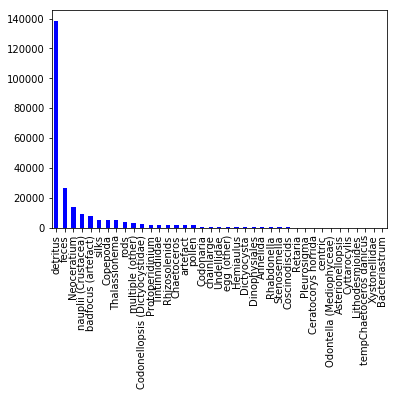

In [15]:
# Plot the repartition of the labels
df.level2.value_counts().plot(kind='bar', color = 'b')

In [20]:
(df.level2.value_counts()/df.shape[0])*100

detritus                          56.828127
feces                             11.057017
Neoceratium                        5.752637
nauplii (Crustacea)                3.814704
badfocus (artefact)                3.221543
silks                              2.310660
Copepoda                           2.110340
Thalassionema                      2.100488
rods                               1.660030
multiple (other)                   1.338615
Codonellopsis (Dictyocystidae)     1.185501
Protoperidinium                    0.926070
Tintinnidiidae                     0.914166
Rhizosolenids                      0.886663
Chaetoceros                        0.864086
artefact                           0.759000
pollen                             0.747506
Codonaria                          0.346866
chainlarge                         0.308280
Undellidae                         0.291449
egg (other)                        0.281187
Hemiaulus                          0.275030
Dictyocysta                     

<div class="alert alert-danger">
The classes are very unbalanced. We have to consider this for our model evaluation and during the processing. With the current data, a baseline model would output 56.8% accuracy.    
</div>

## 3. Performance Evaluation

# Second method : with the images

### Data Augmentation

In [17]:
# Je travail sur ZoeCloudPlatform, je suis pas sûr d'avoir bien installé Keras...
from tensorflow.keras import backend as k

In [20]:
# Data science libs
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [27]:
PATH_TO_DATA = './data/imgs.zip'

In [26]:
import zipfile
from io import BytesIO
from PIL import Image
import numpy as np

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


img_files = extract_zip_to_memory(PATH_TO_DATA)

# Display an example image 
# Image.open(img_files['imgs/32738710.jpg'])

# Load the image as a numpy array:
# np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))

# Be aware that the dictionary will occupy roughly 2GB of computer memory!
# To free this memory again, run:
# del img_files




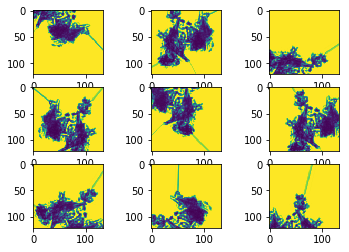

In [182]:
# img as a numpy array
data = np.array(Image.open(img_files['imgs/32738715.jpg']))

# add number of channels (here 1 because grayscale)
data_gray = expand_dims(data, 2)

# expand dimension to one sample
samples = expand_dims(data_gray, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-10, 10], 
                             height_shift_range=0.5,
                             horizontal_flip=True, 
                             rotation_range=90,
                             brightness_range=[0.2,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing 
    image = np.squeeze(batch[0], axis=2).astype('uint8')
    pyplot.imshow(image)

# show the figure
pyplot.show()

This generates new data by applying a shift in width/height, rotation of 90°, and brightness, all randomly.

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

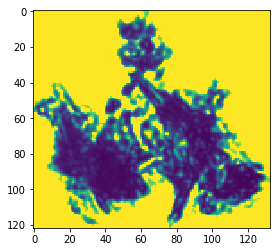

In [183]:
# original image before augmentation
pyplot.imshow(data) # cmap='gray' to display in grayscale

In [32]:
import zipfile
from io import BytesIO
from PIL import Image
import numpy as np

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


img_files = extract_zip_to_memory("../../imgs.zip")

# Display an example image 
Image.open(img_files['imgs/32738710.jpg'])

# Load the image as a numpy array:
np_arr = np.array(Image.open(img_files['imgs/32738710.jpg']))

# Be aware that the dictionary will occupy roughly 2GB of computer memory!
# To free this memory again, run:
# del img_files

In [38]:
# Creation of the array with all the images

X = []

for index, img in enumerate(img_files) :
    
     X.append(   np.array(Image.open(img_files[img]))      )


    


In [39]:
def convert_image(array) :
    # Plot an image from a numpy array
    return Image.fromarray(array)



In [40]:
# Resized image
convert_image(X[0]).resize((28,28), Image.ANTIALIAS)

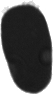

In [41]:
# Original image
convert_image(X[0])

In [42]:
indexes_nan_level2 = meta.level2[meta.level2.isnull()].index

meta.drop(indexes_nan_level2 , axis = 0 , inplace = True)

In [43]:
# Convert the label into classes
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
meta.level2 = le.fit(meta.level2).transform(meta.level2)







In [44]:
# Creation of the array with all the images RESIZED

y_img = np.zeros((meta.shape[0],1))
X_resized = np.zeros((  meta.shape[0] , 784  ))

index = 0
for img in img_files : 
    
    # Objid
    value = int(img[5:].split('.')[0])
    # The position of the image in the database
    index_img = np.where(meta.objid == value)
    if index_img[0] :
        # Check if the label is not NaN
        
        lvl2 = meta.level2.iloc[index_img[0][0]]
        y_img[index,:] = lvl2
        X_resized[index, ...] = np.array(Image.open(img_files[img]).resize((28,28), Image.ANTIALIAS) ).flatten()
        
        index+=1
        
    
    
    


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]


In [45]:
idx_test = np.random.choice(np.arange(X_resized.shape[0]) , int(X_resized.shape[0] * 0.1))

In [46]:
idx_train = np.ones( X_resized.shape[0] , bool)
idx_train[idx_test] =False


In [48]:
idx_train.shape

(242607,)

In [49]:
X_resized.shape

(242607, 784)

In [51]:
X_train, X_test, y_train, y_test = X_resized[idx_train,:] , X_resized[idx_test,:] , y_img[idx_train,:],y_img[idx_test,:]

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(219558, 784) (24260, 784) (219558, 1) (24260, 1)


Fully connected Neural Network 

In [53]:
len(meta.level2.unique())

39

In [54]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [55]:
X_train[0].flatten().shape

(784,)

In [56]:
x = tf.placeholder(tf.float32 , [None, 784],name = 'inputs')
y_true = tf.placeholder(tf.float32 , [None,40] , name = 'labels')
y_true_cls = tf.argmax(y_true,  1)

In [57]:
# One fully connected layer 

weights = tf.Variable(tf.zeros([784, 40]), name = 'weights')
biases = tf.Variable(tf.zeros([40]), name = 'bias')


In [58]:
with tf.name_scope('model') : 
    logits = tf.matmul(x , weights) + biases
    y_pred = tf.nn.softmax(logits)
    y_pred_cls = tf.argmax(y_pred , axis = 1)

In [59]:
with tf.name_scope('loss') : 
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits , labels = y_true)
    loss = tf.reduce_mean(cross_entropy)

In [60]:
learning_rate = 0.01
with tf.name_scope('optim') : 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    opt_step = optimizer.minimize(loss)


In [61]:
with tf.name_scope('accuracy') : 
    
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(     correct_prediction    , tf.float32    ))
    

In [62]:
session = tf.Session()
init_op = tf.global_variables_initializer()
session.run(init_op)



In [63]:
batch_size = 100


In [64]:
def reshape_y(y) : 
    # One hot encoding for the labels

    C = tf.constant(40, name = 'C')

    one_hot_matrix = tf.reshape(tf.one_hot(y , C , axis=0) , (y.shape[0] , 40))
    one_hot = session.run(one_hot_matrix)

    return one_hot
    


In [65]:
def optimize(epochs) : 
    
    for e in range(epochs) : 
        num_of_batches = int(  X_resized.shape[0]   /batch_size )
        
        avg_loss = 0
        
        for i in rang(num_of_batches) : 
            idx = np.random.choice(np.arange(X_train.shape[0]), batch_size, replace= True)
            x_batch, y_true_batch = X_train[idx,...] , reshape_y(y_train[idx,...])
            
            feed_dict_train = {x : x_batch , y_true : y_true_batch}
            
            session.run(opt_step , feed_dict = feed_dict_train)
            
            batch_loss, summary = session.run([loss], feed_dict = feed_dict_train)
            
            avg_loss += batch_loss / num_of_batches
        
        print("Epoch: ", '%02d' % (e + 1), "  =====> Loss =", "{:.6f}".format(avg_loss))
        
def print_accuracy() :
    feed_dict_test = {x: X_test, y_true : reshape_y(y_test)}
    acc = session.run(accuracy, feed_dict = feed_dict_test)
    
    print("Accuracy on test-set: {0:.1%}".format(acc))
            
            
        
        
    

In [66]:
print_accuracy()

Accuracy on test-set: 76.3%


In [219]:
# Let's use the DEEPLEARNING lab to implement the AlexNet network


### NOT IMPLEMENTED YET ! THE REST IS NOT DONE 



In [252]:
def weight_variable(shape, name) :
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial , name = name)



def bias_variable(shape, name) : 
    
    initial = tf.constant(0. , shape = shape)
    return tf.Variable(initial, name = name)
    
    
    
    


In [253]:
def build_lenet5(x):
    with tf.name_scope("reshape"):
        image = tf.reshape(x, [-1, 28, 28, 1]) # [None, 28, 28, 1]
    
    with tf.name_scope("lenet5"):
        with tf.name_scope("layer1"):
            # The size of the weight is : [ filter_size , number of filters   ]
            # Which is here : [ 5 x 5 x 1 , 6]
            # Number of parameters : 5x5x1x6+6 = 156 
            # Connections : 28 x 28 x 156 = 122304
            conv1_w = weight_variable(shape = [5,5,1,6 ],name = "weights_1")
            # Size of the bias, equal to the number of filters
            conv1_b = bias_variable(shape=[6],name = "bias_1")
            # Convolution
            # The size of stride is either 1,2 or 4
            # This is the size of the stride for each dimension of the input 
            # Padding = SAME means padding to fix the size of the output equal to the input 
            # Input : 28x28x1  Convolution : 28x28x6   
            conv1 = tf.nn.conv2d(image,conv1_w,strides = [1,1,1,1], padding = "SAME" ) + conv1_b 
            # Activation : ReLu
            conv1 = tf.nn.relu(conv1)
            # MaxPooling : Input = 28x28x6     Output = 14x14x6
            # The size of the maxpooling is 2x2. Therefore ksize = [1, 2, 2, 1]
            pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1],strides = [1,2,2,1], padding = "VALID")
            

        with tf.name_scope("layer2"):
            
            conv2_w = weight_variable(shape = [5,5,6,16],name = "weights_2")
            # Input : 14x14x6     Output : 10x10x16   
            conv2_b = bias_variable(shape = [16] , name="bias_2")
            # Convolution
            conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = "VALID") + conv2_b
            # Activation : ReLu
            conv2 = tf.nn.relu(conv2)
            # Max Pooling 
            # Input : 10x10x16  Output : 5x5x16
            pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID" )
            
        
        with tf.name_scope("flatten"):
            # Change from 3D to 1D
            # Input : 5x5x16   Output : 400
            flat = tf.reshape(pool_2,[-1,400], name="flatten")
            
                                    
            
        with tf.name_scope("layer3"):
            # Fully connected layer
            # Input : 400   Output : 120
            flat1_w = weight_variable(shape=[400,120], name="weights_fully_1")
            flat1_b = bias_variable(shape = [120], name="bias_fully_1" )
            # Matrix multiplication between flat and weights
            flat1 = tf.matmul(flat, flat1_w) + flat1_b
            # Activation : ReLu
            flat1 = tf.nn.relu(flat1)
            
        with tf.name_scope("layer4"):
            # Fully connected layer
            # Input : 120  Output : 84
            flat2_w = weight_variable(shape=[120,84], name="weights_fully_2")
            flat2_b = bias_variable(shape = [84], name="bias_fully_2" )
            flat2 = tf.matmul(flat1, flat2_w) + flat2_b
            # Activation : ReLu
            flat2 = tf.nn.relu(flat2)

        with tf.name_scope("layer5"):
            # Fully connected layer
            # Input : 84     Output : 10
            flat3_w = weight_variable(shape=[84,10], name="weights_fully_output")
            flat3_b = bias_variable(shape = [10], name="bias_fully_output" )
            
            logits = tf.matmul(flat2, flat3_w) + flat3_b
            # Activation : SoftMax
            #logits = tf.nn.softmax(logits)
                
            
    return logits

In [254]:
tf.reset_default_graph() # reset the default graph before defining a new model

# Parameters
learning_rate = 0.001
batch_size = 128

# Model, loss function and accuracy
x = tf.placeholder(tf.float32, [None, 784], name='inputs')
y_true = tf.placeholder(tf.float32, [None, 10], name='labels')
y_true_cls = tf.argmax(y_true, 1) 

with tf.name_scope('model'):
    logits = build_lenet5(x)
    y_pred = tf.nn.softmax(logits)
    y_pred_cls = tf.argmax(y_pred, axis=1)

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope('optim'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    opt_step = optimizer.minimize(loss)
    
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    
session =  tf.Session()
init_op = tf.global_variables_initializer()
session.run(init_op)

writer = tf.summary.FileWriter(next_path('logs/lenet5/run_%02d'))
tf.summary.scalar("Loss", loss)
tf.summary.scalar("Accuracy", accuracy)
merged_summary_op = tf.summary.merge_all()

writer.add_graph(tf.get_default_graph())

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [ ]:
def optimize(epochs):
    # Go through the traning dataset `epochs` times
    for e in range(epochs):
        
        num_of_batches = int(mnist.train.num_examples/batch_size)
        
        # We save also the loss across all the batches of data for 
        # presentation purpose
        avg_loss = 0.
        
        
        # Loop over all batches
        for i in range(num_of_batches):
            # Get a batch of training examples (shuffle every epoch).
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = mnist.train.next_batch(batch_size, shuffle=(i==0))
            
            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            # Note that the placeholder for y_true_cls is not set
            # because it is not used during training.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            session.run(opt_step, feed_dict=feed_dict_train)
            
            # Similarly, get the loss and accuracy metrics on the batch of data
            batch_loss, summary = session.run([loss, merged_summary_op], feed_dict=feed_dict_train)
            
            # Write logs at every iteration
            writer.add_summary(summary, e * num_of_batches + i)
            
            # Compute average loss
            avg_loss += batch_loss / num_of_batches
            
           
                
                
                
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()    
        acc = session.run(accuracy, feed_dict=feed_dict_train, options=run_options, run_metadata=run_metadata)
        print("Epoch: ", '%02d' % (e + 1), "  =====> Loss =", "{:.6f}".format(avg_loss))
        print("Epoch: ", '%02d' % (e + 1), "  =====> Accuracy =", "{:.6f}".format(acc))
        
        
def print_accuracy():
    feed_dict_test = {x: mnist.test.images,
                  y_true: mnist.test.labels}
    
    # Use TensorFlow to compute the accuracy.
    # We are also going to save some metric like memory usage and computation time
    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    acc = session.run(accuracy, feed_dict=feed_dict_test, options=run_options, run_metadata=run_metadata)
    try:
        writer.add_run_metadata(run_metadata, 'inference')
    except ValueError:
        pass
    writer.flush()
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))